In [13]:
import matplotlib.pyplot as plt
from kaplan.energy import run_energy_calc
from kaplan.inputs import Inputs
import psutil
import gc
import psi4

In [14]:
inputs = Inputs()
inputs.update_inputs({
    "struct_input": "propane",
    "prog": "psi4",
    "init_popsize": 6,
    "num_slots": 6,
    "mating_rad": 2,
})

In [17]:
result = run_energy_calc(inputs.coords)
print(type(result))
print(result)

<class 'float'>
-116.88553490846449


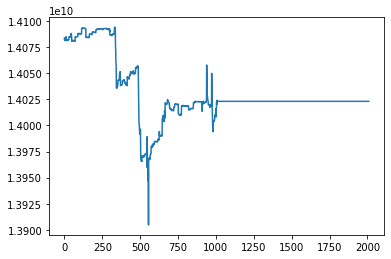

In [22]:
mems_no_gc = []
# first take a base line measurement
for i in range(100000):
    if i % 100 == 0:
        mem = psutil.virtual_memory()
        mems_no_gc.append(mem.available)
        gc.collect()
# do ten energy evals
for i in range(10):
    result = run_energy_calc(inputs.coords)
    mem = psutil.virtual_memory()
    mems_no_gc.append(mem.available)
# see if the memory usage stays low
for i in range(100000):
    if i % 100 == 0:
        mem = psutil.virtual_memory()
        mems_no_gc.append(mem.available)

plt.plot(mems_no_gc)

In [16]:
mems_clean = []
for i in range(1000000):
    result = run_energy_calc(inputs.coords)
    psi4.core.clean()
    mem = psutil.virtual_memory()
    mems_clean.append(mem.available)
# see if the memory usage stays low
for i in range(100000):
    mem = psutil.virtual_memory()
    mems_clean.append(mem.available)

plt.plot(mems_clean)

KeyboardInterrupt: 

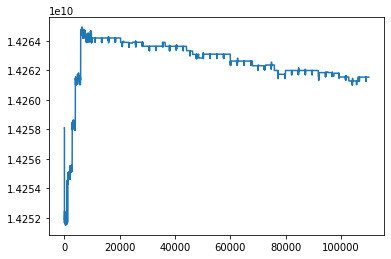

In [5]:
mems_clean_all = []
for i in range(1000000):
    result = run_energy_calc(inputs.coords)
    psi4.core.clean()
    psi4.core.clean_options()
    psi4.core.clean_variables()
    psi4.core.close_outfile()
    mem = psutil.virtual_memory()
    mems_clean_all.append(mem.available)
# see if the memory usage stays low
for i in range(100000):
    i + 1
    mem = psutil.virtual_memory()
    mems_clean_all.append(mem.available)

plt.plot(mems_clean_all)

In [3]:
for i in range(45):
    gc.collect()

In [6]:
gc.collect()

20

In [21]:
gc.collect()

757

In [10]:
len(mems_no_gc)
del mems_no_gc

In [11]:
mems_no_gc

NameError: name 'mems_no_gc' is not defined